Data 620 Web Analytics

Summer 2023

Khyati Naik

Laura Puebla

Youtube Video Link :- https://youtu.be/f4OI2o5KprU

Week Three - Part 2 - Assignment Data Sets
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?
Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

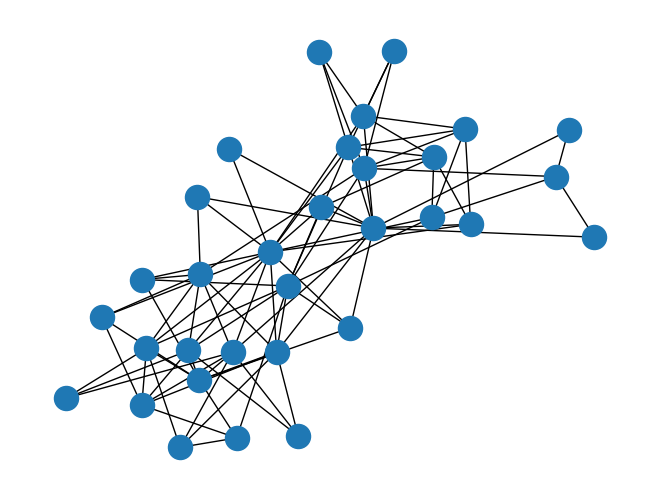

In [ ]:
# import the necessary libraries, including matplotlib.pyplot for visualization and networkx for working with graphs.
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

# nx.davis_southern_women_graph() function creates a bipartite graph (G)
# representing the social network of Southern women involved in social events.
# The graph has two sets of nodes: "women" and "clubs."
G = nx.davis_southern_women_graph()

# sets of women and clubs are extracted from the graph
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
# This matrix represents the relationships between women and clubs, indicating which women are members of which clubs.
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes

# creates a new graph W that represents connections between women based on shared club membership.
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")

# Calculate the degree of each woman in this projected graph using W.degree(w),
# which counts the number of connections (friends) each woman has.
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")

# Calculate the weighted degree of each woman in this projected graph
# which counts the total number of shared club memberships (friend meetings).
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

Biadjacency Matrix:

The biadjacency matrix represents the relationships between women and social events/clubs.
Each woman is associated with one or more social events/clubs.
The matrix helps visualize the membership patterns and identifies which women are connected to specific social events/clubs.
#Friends, Member:

The section displays the number of friends each woman has within the network.
Evelyn Jefferson, Theresa Anderson, Ruth DeSand, Verne Sanderson, and Sylvia Avondale have the highest number of friends, with 17 connections each.
Charlotte McDowd, Olivia Carleton, and Flora Price have the fewest number of friends, with only 11 or 12 connections.
#Friend meetings, Member:

This section shows the number of shared club memberships (friend meetings) for each woman.
Evelyn Jefferson has the highest number of friend meetings, indicating that she participates in multiple social events/clubs with other women.
Laura Mandeville, Theresa Anderson, Brenda Rogers, and Sylvia Avondale also have a significant number of friend meetings.
Flora Price, Olivia Carleton, Dorothy Murchison, and Charlotte McDowd have the fewest friend meetings, suggesting they have relatively fewer interactions through shared club memberships.
Overall, the analysis of the output suggests that some women have a higher level of social engagement within the network. Evelyn Jefferson emerges as a central figure, having a large number of friends and participating in numerous club memberships. On the other hand, Charlotte McDowd, Olivia Carleton, and Flora Price seem to have relatively fewer connections and engagements within the network. This information can be further analyzed to explore the social dynamics, cliques, and influential individuals within the Davis Southern Women network.

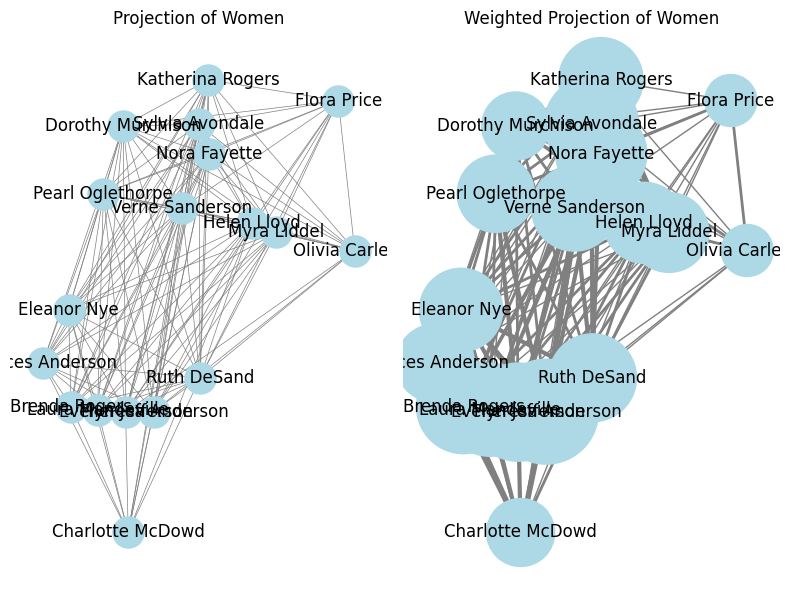

In [ ]:
# Visualization: Projection of Women
plt.figure(figsize=(8, 6))
plt.subplot(121)
nx.draw(W, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', width=0.5, pos=pos)
plt.title("Projection of Women")

# Visualization: Weighted Projection of Women
plt.subplot(122)
edge_width = [W[u][v]['weight'] for u, v in W.edges()]
node_size = [W.degree(w, weight='weight') * 100 for w in women]
nx.draw(W, with_labels=True, node_color='lightblue', node_size=node_size, edge_color='gray', width=edge_width, pos=pos)
plt.title("Weighted Projection of Women")

plt.tight_layout()
plt.show()

Visualization: Projection of Women:

We use nx.draw() to visualize the projection of women based on shared club membership (W graph).
The nodes are labeled with women's names, and the edges represent connections between women.
The node_color, node_size, edge_color, and width parameters are set to customize the appearance of the graph. By examining this visualization, we can observe the overall structure of the network and identify clusters or groups of women who share common club memberships.

Visualization: Weighted Projection of Women:

We use nx.draw() to visualize the weighted projection of women based on the number of shared club memberships (W graph).
The node size is set proportional to the total number of shared club memberships (friend meetings) using the node_size parameter.
The width of the edges is set based on the weight (number of shared club memberships) using the width parameter.
This visualization provides a visual representation of the frequency or intensity of interactions between women within the social network.